<a href="https://colab.research.google.com/github/nena00s/-PyCaret/blob/main/Copy_of_PyCaret_Capstone_Automating_ML_and_Custom_Toolkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heart-attack-analysis-prediction-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1226038%2F2047221%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T161055Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D87ca515aea4087669733c6fe3a66d0d06b343a8ec843f40b1231f720320ff7b2fe91c7c6ee415dab45925a7c3b53724f09870742dabad7f13697c78dcb7c4610d122e8ba3889ff916b5ea24c3f4ae82cddbbc863034f1b9a0f4ac6a8b1e5af64c1380622e8f0468b2bacd81a0c4ad5c39cd2afe5cbe443e8115ab7e7106ed1ec350362fca2e9c3636b660ad70873586a1ee87d17af2d62a3307eedbfef247188578e9a391a04ae870e0ac866b3c93bfca7b7a70201a27623851bb79baa5a5345cced0499ffa427ac89458fc842e3b057996872dacc46e918fe2a33e871f6df459552ed80c591b3e7df013057c939f3e902b67ff3ea1f956aae7ce99bbff6f3c0,pycaret:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3759477%2F6503413%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T161055Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2670fdad206d2b71cc843756b552e9db90a68fc863820ad3cec2813b55ea79c5230490f0f796e80850f02a675529abad838472e540449c256338325929d3b589d55baf972800e16abad3a4f307fab595cd58b55a3da7acc13f1f7f55ed5b00fc8218687d3f2151b9761a4c36f60239e8110ea9f155f2dc9b76a713bb5585bc60a76b8d9ddbad5e2c17f8dd2956f9c1d31fab2dedc83280a0edc6745cd194e6909a87098cfd7a5b5889832f778c416fc31200452d303640fafeb02c1702bb1cbbc4ec59b7f5fc45304a37cd7a74c18d8f16d2449f4e0689f08c4a859f3b8e3d9eb92105beb2804d29578aba513a710f2a252325559d56ccaf162e61a45d100ba4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4209 bytes downloaded
Downloaded and uncompressed: heart-attack-analysis-prediction-dataset
[==================================================] 2690 bytes downloaded
Downloaded and uncompressed: pycaret
Data source import complete.


In [ ]:
! pip install pycaret streamlit pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.8 MB

![image.png](attachment:c22e1b62-8a38-4f13-8667-76c5bb2945c9.png)

* Explore PyCaret, a Python library for automated machine learning.
* Create a custom package that automates data handling and ML processes.
* Start by learning PyCaret's data loading, EDA, model training, and AutoML features.
* Develop a package to load data, perform EDA, train models, auto-select regressors/classifiers, and allow model selection via Streamlit web app.
* Thoroughly test the package on various datasets to ensure functionality and accuracy.
* Gain valuable skills in PyCaret and package development, boosting your data scientist portfolio and marketability.

In [ ]:
import streamlit as st
import pycaret.classification as pc
import pycaret.regression as pr
import pandas as pd
import sqlite3
import json
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline



# Set the background color to light coffee
st.markdown(
    """
    <style>
    body {
        background-color: #f3e0c6;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Create a Streamlit app
st.title("PyCaret Streamlit App")

# Sidebar for dataset input and configuration
st.sidebar.header("Dataset Configuration")

# Ask the user to provide the dataset type
dataset_type = st.sidebar.selectbox("Select the type of dataset", ["CSV", "Excel", "SQL", "JSON"])


2024-05-14 16:12:47.486 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-05-14 16:12:47.489 Session state does not function when running a script without `streamlit run`


In [ ]:
import pycaret.classification as pc
from pycaret.classification import setup
import pandas as pd
import sqlite3
import json

"""
##### For User Input
# Ask the user to provide the dataset type
dataset_type = input("Enter the type of dataset (CSV, Excel, SQL, or JSON): ").lower()

# Load the dataset based on the provided type
if dataset_type == 'csv':
    dataset_path = input("Enter the path to your CSV dataset: ")
    data = pd.read_csv(dataset_path)
elif dataset_type == 'excel':
    dataset_path = input("Enter the path to your Excel dataset: ")
    data = pd.read_excel(dataset_path)
elif dataset_type == 'sql':
    db_path = input("Enter the path to your SQLite database: ")
    conn = sqlite3.connect(db_path)
    query = input("Enter your SQL query to fetch the data: ")
    data = pd.read_sql_query(query, conn)
    conn.close()
elif dataset_type == 'json':
    dataset_path = input("Enter the path to your JSON dataset: ")
    with open(dataset_path, 'r') as json_file:
        json_data = json.load(json_file)
        data = pd.DataFrame(json_data)
else:
    print("Unsupported dataset type. Please provide CSV, Excel, SQL, or JSON.")
    exit()
"""

dataset_type == 'csv'
dataset_path = "/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv"
data = pd.read_csv(dataset_path)


In [ ]:
# Display column names and data types
print("Column Names and Data Types:")
print(data.dtypes)

Column Names and Data Types:
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


In [ ]:
"""
#### For User Input

# Ask the user for columns to drop
columns_to_drop = input("Enter columns to drop (comma-separated): ").split(',')
data.drop(columns=columns_to_drop, inplace=True)

# Handle missing values based on user input
for col in data.columns:
    if data[col].dtype == 'object':
        # Handle categorical columns
        fill_method = input(f"What to do with missing values in '{col}' (most_frequent / additional_class / skip): ").strip()
        if fill_method == 'most_frequent':
            data[col].fillna(data[col].mode()[0], inplace=True)
        elif fill_method == 'additional_class':
            data[col].fillna('Missing', inplace=True)
    else:
        # Handle numeric (continuous) columns
        fill_method = input(f"What to do with missing values in '{col}' (mean / median / mode / skip): ").strip()
        if fill_method == 'mean':
            data[col].fillna(data[col].mean(), inplace=True)
        elif fill_method == 'median':
            data[col].fillna(data[col].median(), inplace=True)
        elif fill_method == 'mode':
            data[col].fillna(data[col].mode()[0], inplace=True)

"""

columns_to_drop = ["sex", "age"]
data.drop(columns=columns_to_drop, inplace=True)


In [ ]:
import pycaret.regression as pr
"""
#### For The User Input
# Initialize PyCaret with the dataset
target_column_name = input("Enter the name of the target column: ")
clf = pc.setup(data, target=target_column_name, session_id=123, normalize=True, transformation=True)
"""
target_column_name = "cp"
clf = pc.setup(data, target=target_column_name, session_id=123, normalize=True, transformation=True)


# Handle missing values
data.dropna(inplace=True)  # Remove rows with missing values, you can customize this based on your needs

# classification or regression
if data[target_column_name].dtype in ['int64', 'float64']:
    # Assuming it's regression if the target column contains numerical values
    task_type = 'regression'
else:
    # Assuming it's classification if the target column contains non-numerical values
    task_type = 'classification'

print(f"Detected task type: {task_type}")

if task_type == 'classification':
    clf = pc.setup(data, target=target_column_name, session_id=123, normalize=True, transformation=True)
    # Perform classification tasks using PyCaret
    best_model = pc.compare_models()
    # Rest of your classification-related code...
elif task_type == 'regression':
    reg = pr.setup(data, target=target_column_name, session_id=123, normalize=True, transformation=True)
    # Perform regression tasks using PyCaret
    best_model = pr.compare_models()
    # Rest of your regression-related code...
else:
    print("Unsupported task type. Please check the target column data type.")
    exit()


,Description,Value
0,Session id,123
1,Target,cp
2,Target type,Multiclass
3,Original data shape,"(303, 12)"
4,Transformed data shape,"(303, 12)"
5,Transformed train set shape,"(212, 12)"
6,Transformed test set shape,"(91, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


Detected task type: regression


,Description,Value
0,Session id,123
1,Target,cp
2,Target type,Regression
3,Original data shape,"(303, 12)"
4,Transformed data shape,"(303, 12)"
5,Transformed train set shape,"(212, 12)"
6,Transformed test set shape,"(91, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.7300,0.8158,0.8902,0.2445,0.4654,0.3755,0.0550
ridge,Ridge Regression,0.7170,0.8223,0.8930,0.2394,0.4688,0.3719,0.0550
lr,Linear Regression,0.7167,0.8230,0.8933,0.2388,0.4691,0.3718,0.7940
lar,Least Angle Regression,0.7167,0.8230,0.8933,0.2388,0.4691,0.3718,0.0550
huber,Huber Regressor,0.7187,0.8407,0.9038,0.2209,0.4753,0.3851,0.0640
knn,K Neighbors Regressor,0.7386,0.8499,0.9134,0.1919,0.4755,0.4128,0.0910
rf,Random Forest Regressor,0.7313,0.8587,0.9198,0.1887,0.4785,0.3891,0.4030
lightgbm,Light Gradient Boosting Machine,0.7709,0.8922,0.9378,0.1628,0.4907,0.4139,0.0980
ada,AdaBoost Regressor,0.8202,0.9035,0.9425,0.1543,0.5041,0.3729,0.1710
et,Extra Trees Regressor,0.7439,0.9216,0.9483,0.1370,0.4932,0.4400,0.3160


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Perform any desired data preprocessing and model training using PyCaret's functions
best_model = pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5050,0.6749,0.5050,0.4646,0.4782,0.2285,0.2331,0.6640
lda,Linear Discriminant Analysis,0.5039,0.0000,0.5039,0.4960,0.4876,0.2336,0.2409,0.0620
ridge,Ridge Classifier,0.4996,0.0000,0.4996,0.4479,0.4593,0.1991,0.2110,0.0660
lr,Logistic Regression,0.4946,0.0000,0.4946,0.4869,0.4769,0.2186,0.2257,0.0700
nb,Naive Bayes,0.4907,0.6881,0.4907,0.4740,0.4698,0.2301,0.2395,0.0660
rf,Random Forest Classifier,0.4816,0.6789,0.4816,0.4038,0.4335,0.1582,0.1699,0.4390
knn,K Neighbors Classifier,0.4814,0.6448,0.4814,0.4052,0.4281,0.1685,0.1795,0.0810
dummy,Dummy Classifier,0.4719,0.5000,0.4719,0.2227,0.3026,0.0000,0.0000,0.0630
xgboost,Extreme Gradient Boosting,0.4524,0.6474,0.4524,0.4085,0.4240,0.1332,0.1364,0.2420
svm,SVM - Linear Kernel,0.4519,0.0000,0.4519,0.4546,0.4370,0.1689,0.1745,0.0730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
from pycaret.classification import setup, compare_models, tune_model
import pycaret.classification as pc
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Perform feature selection (you can choose a different method)
best_features = compare_models(fold=5, sort='F1')

# Create a custom pipeline with feature selection and Logistic Regression
pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('lr', LogisticRegression())
])

# Define a custom grid for hyperparameter tuning
param_grid = {
    'select__k': [1, 2, 3, 4, 5],  # Adjust the number of selected features
    'lr__C': [0.001, 0.01, 0.1, 1, 10],  # Adjust regularization strength
}

# Tune the custom pipeline with the custom grid
tuned_lr = tune_model(pipeline, custom_grid=param_grid)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5096,0.6985,0.5096,0.4850,0.4885,0.2586,0.2638,0.0740
ridge,Ridge Classifier,0.5189,0.0000,0.5189,0.4683,0.4839,0.2359,0.2426,0.0680
lda,Linear Discriminant Analysis,0.5049,0.0000,0.5049,0.4747,0.4837,0.2322,0.2369,0.1220
lr,Logistic Regression,0.5047,0.0000,0.5047,0.4741,0.4825,0.2274,0.2322,0.0720
lightgbm,Light Gradient Boosting Machine,0.4757,0.6559,0.4757,0.4649,0.4598,0.1863,0.1902,0.4940
svm,SVM - Linear Kernel,0.4663,0.0000,0.4663,0.4659,0.4540,0.1923,0.1970,0.0740
rf,Random Forest Classifier,0.4950,0.6717,0.4950,0.4226,0.4479,0.1727,0.1841,0.4140
et,Extra Trees Classifier,0.4763,0.6424,0.4763,0.4260,0.4434,0.1631,0.1684,0.4160
gbc,Gradient Boosting Classifier,0.4527,0.0000,0.4527,0.4521,0.4407,0.1439,0.1466,0.9400
xgboost,Extreme Gradient Boosting,0.4526,0.6370,0.4526,0.4273,0.4332,0.1474,0.1505,0.1460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.0000,0.5000,0.4091,0.4394,0.2244,0.2495
1,0.6364,0.0000,0.6364,0.5227,0.5606,0.4359,0.4847
2,0.5714,0.0000,0.5714,0.4632,0.5014,0.3127,0.3417
3,0.5238,0.0000,0.5238,0.4656,0.4779,0.2473,0.2766
4,0.6667,0.0000,0.6667,0.5159,0.5801,0.4494,0.4811
5,0.5238,0.0000,0.5238,0.5302,0.4794,0.2391,0.2929
6,0.5714,0.0000,0.5714,0.5306,0.5076,0.3415,0.4096
7,0.4762,0.0000,0.4762,0.3730,0.4173,0.1348,0.1433
8,0.4762,0.0000,0.4762,0.4921,0.4337,0.2062,0.2617


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5455,0.0000,0.5455,0.5579,0.5433,0.3125,0.3136
1,0.5909,0.0000,0.5909,0.5227,0.5537,0.3654,0.3709
2,0.4762,0.0000,0.4762,0.4968,0.4625,0.1951,0.2079
3,0.4286,0.0000,0.4286,0.4078,0.4170,0.1127,0.1131
4,0.7143,0.0000,0.7143,0.7262,0.6699,0.5316,0.5532
5,0.5714,0.0000,0.5714,0.6124,0.5847,0.3438,0.3486
6,0.4762,0.0000,0.4762,0.4841,0.4698,0.2169,0.2238
7,0.5238,0.0000,0.5238,0.4286,0.4540,0.2045,0.2246
8,0.3333,0.0000,0.3333,0.3107,0.3175,-0.0769,-0.0787


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

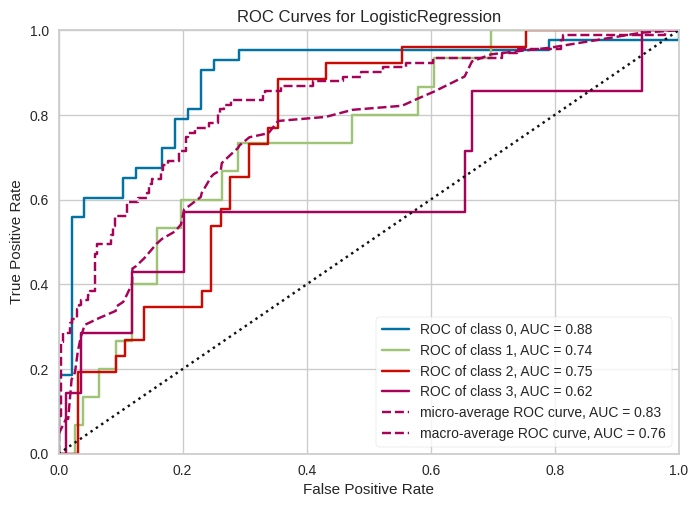

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4545,0.7324,0.4545,0.3820,0.4151,0.1484,0.1513
1,0.4091,0.6655,0.4091,0.2727,0.3273,0.0338,0.0364
2,0.6190,0.6972,0.6190,0.5119,0.5377,0.3360,0.3864
3,0.4762,0.6805,0.4762,0.4558,0.4623,0.1923,0.1944
4,0.6190,0.7841,0.6190,0.4762,0.5333,0.3412,0.3821
5,0.6190,0.7189,0.6190,0.5311,0.5694,0.3514,0.3637
6,0.3810,0.6655,0.3810,0.3333,0.3550,0.0109,0.0111
7,0.4286,0.5908,0.4286,0.3864,0.4008,0.0632,0.0653
8,0.3810,0.5700,0.3810,0.3270,0.3450,0.0319,0.0329


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

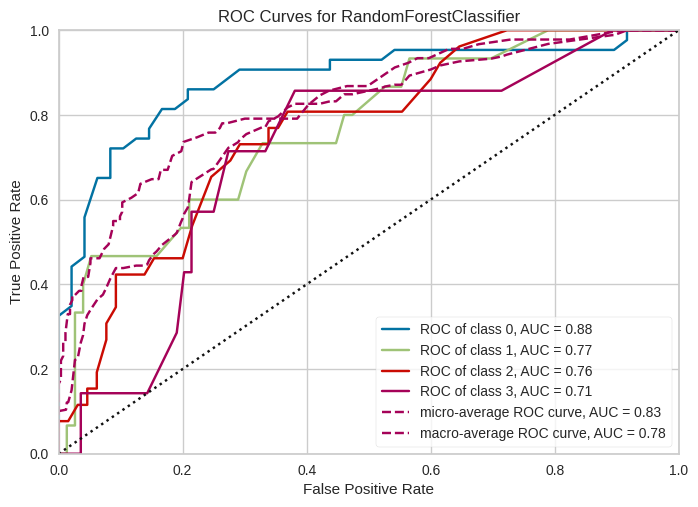

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7199,0.5909,0.5438,0.5609,0.3812,0.3876
1,0.4091,0.6515,0.4091,0.2922,0.3409,0.0592,0.0621
2,0.5238,0.5883,0.5238,0.4816,0.4848,0.2015,0.2125
3,0.4286,0.5817,0.4286,0.4365,0.4300,0.1220,0.1233
4,0.5238,0.7234,0.5238,0.4197,0.4657,0.2075,0.2175
5,0.4286,0.6669,0.4286,0.4233,0.4232,0.0968,0.0978
6,0.3810,0.6772,0.3810,0.3524,0.3636,0.0285,0.0288
7,0.3333,0.5835,0.3333,0.2612,0.2900,-0.1094,-0.1155
8,0.4762,0.6259,0.4762,0.4857,0.4735,0.2451,0.2485


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

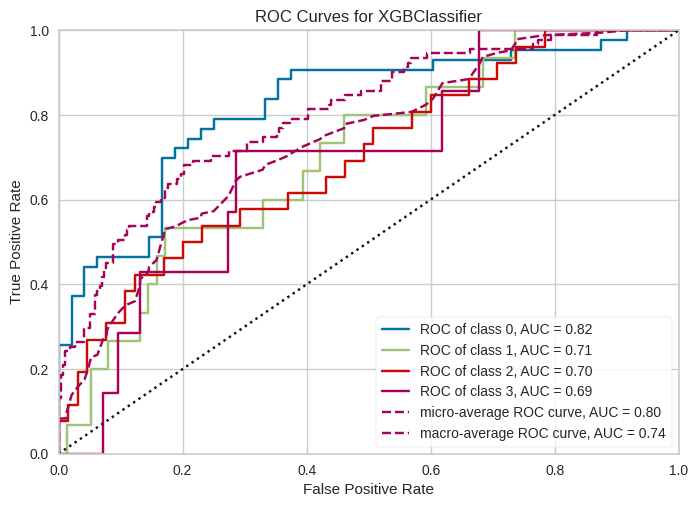

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7461,0.5909,0.5303,0.5579,0.3654,0.3709
1,0.4091,0.7275,0.4091,0.2727,0.3273,0.0403,0.0433
2,0.5714,0.6560,0.5714,0.5311,0.5376,0.2921,0.3018
3,0.4286,0.6284,0.4286,0.4286,0.4286,0.1250,0.1250
4,0.5714,0.7838,0.5714,0.4626,0.5079,0.2759,0.2942
5,0.6190,0.7285,0.6190,0.6311,0.5972,0.3660,0.3744
6,0.4286,0.6788,0.4286,0.4097,0.4168,0.1220,0.1228
7,0.3810,0.6146,0.3810,0.3245,0.3480,-0.0037,-0.0038
8,0.3810,0.6136,0.3810,0.3270,0.3450,0.0319,0.0329


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

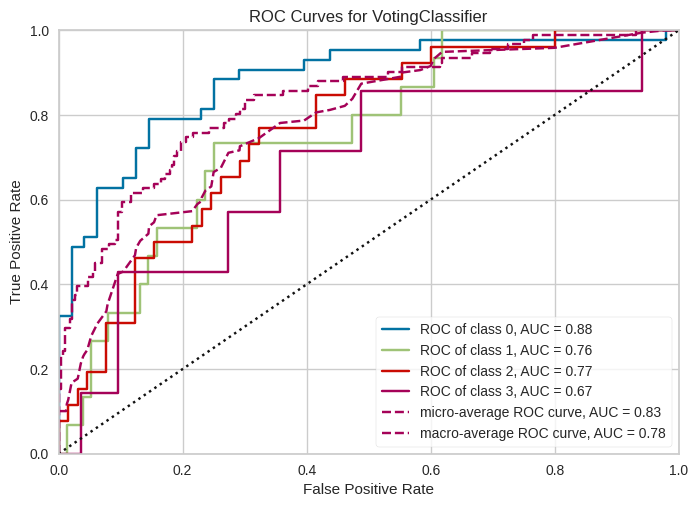

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.7168,0.5000,0.4851,0.4909,0.2531,0.2539
1,0.4091,0.6193,0.4091,0.3864,0.3961,0.1062,0.1077
2,0.4762,0.5966,0.4762,0.4913,0.4809,0.2169,0.2185
3,0.5714,0.7501,0.5714,0.5351,0.5417,0.3026,0.3093
4,0.5714,0.6532,0.5714,0.6439,0.5615,0.3201,0.3291
5,0.5238,0.6069,0.5238,0.4945,0.5008,0.2015,0.2072
6,0.3333,0.5395,0.3333,0.3466,0.3338,-0.0173,-0.0177
7,0.4762,0.6961,0.4762,0.3810,0.4073,0.0906,0.1038
8,0.2857,0.5148,0.2857,0.2341,0.2573,-0.0976,-0.1001


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

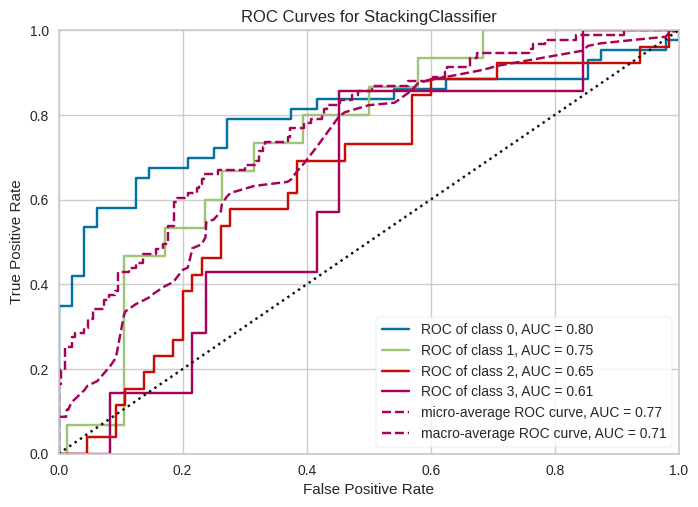

In [ ]:
# Create and train multiple classification models
model1 = pc.create_model('lr')
pc.plot_model(model1)

model2 = pc.create_model('rf')
pc.plot_model(model2)

model3 = pc.create_model('xgboost')
pc.plot_model(model3)

# Blend the classification models
blended_model = pc.blend_models(estimator_list=[model1, model2, model3])
pc.plot_model(blended_model)

# Stack the classification models
stacked_model = pc.stack_models(estimator_list=[model1, model2], meta_model=model3)
pc.plot_model(stacked_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5909,0.7301,0.5909,0.5195,0.5379,0.3400,0.3576
1,0.5000,0.7340,0.5000,0.3831,0.4318,0.1933,0.2034
2,0.5238,0.6666,0.5238,0.4955,0.4984,0.2251,0.2301
3,0.4286,0.6679,0.4286,0.4286,0.4286,0.1250,0.1250
4,0.6190,0.7968,0.6190,0.4694,0.5330,0.3514,0.3830
5,0.6667,0.7596,0.6667,0.6687,0.6400,0.4389,0.4496
6,0.3810,0.6856,0.3810,0.3414,0.3600,0.0250,0.0253
7,0.4762,0.6317,0.4762,0.3912,0.4222,0.1381,0.1460
8,0.3810,0.6040,0.3810,0.3270,0.3500,0.0215,0.0219


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


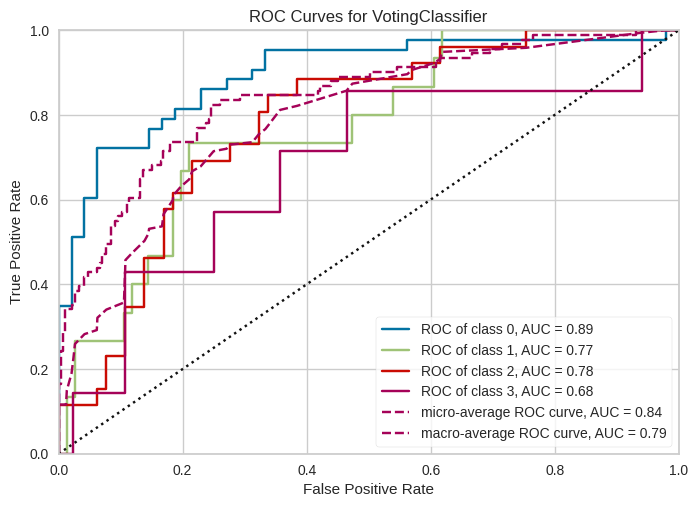

In [ ]:
from pycaret.classification import tune_model, plot_model

# Tune the model using the 'random' tuner without specifying a search library
tuned_model = tune_model(blended_model, n_iter=10)
plot_model(tuned_model)


In [ ]:
from pycaret.classification import evaluate_model

evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Testing Streamlit

In [ ]:
import streamlit as st

st.write("Hello, Streamlit!")


In [ ]:
!cd /kaggle/input/pycaret

#### Webpage doesn't alawys Load

In [ ]:
!streamlit run --browser.gatherUsageStats false /kaggle/input/pycaret/pycaret_me_project.py



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.67.239.202:8501

